In [7]:
import tensorflow as tf
import tensorflow.keras as keras


inputs = tf.keras.Input(shape=(32, 32, 3))

# inputs

pre = inputs

x = keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
x = keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)

# inputs + x
x = keras.layers.Add()([pre, x])


x = keras.layers.MaxPooling2D(2)(x)



pre = x
x = keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = keras.layers.Add()([pre, x])


x = keras.layers.MaxPooling2D(2)(x)

x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(10, activation='softmax')(x)



model = keras.Model(inputs, outputs)
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0   

In [1]:
# too deep: skip connection

import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

# data preparation
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

# normalize
x_train, x_test = x_train / 255.0, x_test / 255.0

# model
inputs = tf.keras.Input(shape=(32, 32, 3))
x = inputs

# block 1
previous = x
x = keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu')(x)
x = keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu')(x)
x = keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu')(x)
x = keras.layers.MaxPooling2D(2)(x)

residual = keras.layers.Conv2D(64, (3, 3), strides=2, padding='same', activation='relu')(previous)
x = keras.layers.add([x, residual]) 


# block 2
previous = x
x = keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu')(x)
x = keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu')(x)
x = keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu')(x)
x = keras.layers.MaxPooling2D(2)(x)

residual = keras.layers.Conv2D(128, (3, 3), strides=2, padding='same', activation='relu')(previous)
x = keras.layers.add([x, residual]) 


# block 3
previous = x
x = keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu')(x)
x = keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu')(x)
x = keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu')(x)
x = keras.layers.MaxPooling2D(2)(x)

residual = keras.layers.Conv2D(256, (3, 3), strides=2, padding='same', activation='relu')(previous)
x = keras.layers.add([x, residual]) 


# block 4
previous = x
x = keras.layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu')(x)
x = keras.layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu')(x)
x = keras.layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu')(x)
x = keras.layers.MaxPooling2D(2)(x)

residual = keras.layers.Conv2D(512, (3, 3), strides=2, padding='same', activation='relu')(previous)
x = keras.layers.add([x, residual]) 


# flatten
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(512, activation='relu')(x)
outputs = keras.layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs, outputs)
model.summary()

# training
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=256, validation_data=(x_test, y_test), epochs=50)

2022-01-26 14:42:53.244065: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-26 14:42:53.247763: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-26 14:42:53.248024: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-26 14:42:53.248383: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 64)   1792        ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 32, 32, 64)   36928       ['conv2d[0][0]']                 
                                                                                                  
 conv2d_2 (Conv2D)              (None, 32, 32, 64)   36928       ['conv2d_1[0][0]']               
                                                                                              

2022-01-26 14:42:55.599922: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201
2022-01-26 14:42:57.342981: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


196/196 [==============================] - 14s 51ms/step - loss: 1.8577 - accuracy: 0.3140 - val_loss: 1.4157 - val_accuracy: 0.4751
Epoch 2/50
196/196 [==============================] - 9s 46ms/step - loss: 1.2337 - accuracy: 0.5560 - val_loss: 1.0796 - val_accuracy: 0.6151
Epoch 3/50
196/196 [==============================] - 9s 46ms/step - loss: 0.9425 - accuracy: 0.6655 - val_loss: 0.8859 - val_accuracy: 0.6866
Epoch 4/50
196/196 [==============================] - 9s 46ms/step - loss: 0.7489 - accuracy: 0.7357 - val_loss: 0.8559 - val_accuracy: 0.7037
Epoch 5/50
196/196 [==============================] - 9s 46ms/step - loss: 0.6146 - accuracy: 0.7852 - val_loss: 0.7182 - val_accuracy: 0.7496
Epoch 6/50
196/196 [==============================] - 9s 46ms/step - loss: 0.4846 - accuracy: 0.8311 - val_loss: 0.7160 - val_accuracy: 0.7650
Epoch 7/50
196/196 [==============================] - 9s 46ms/step - loss: 0.3848 - accuracy: 0.8645 - val_loss: 0.7640 - val_accuracy: 0.7547
Epoch 8/5

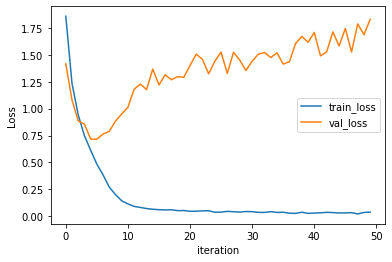

In [2]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label = "train_loss")
plt.plot(history.history['val_loss'], label = "val_loss")
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

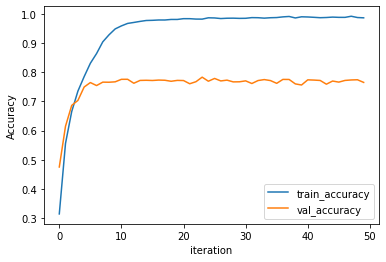

In [3]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label = "train_accuracy")
plt.plot(history.history['val_accuracy'], label = "val_accuracy")
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
# block 1
previous = x
x = keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu')(x)
x = keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu')(x)
x = keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu')(x)
x = keras.layers.add([x, previous])
x = keras.layers.MaxPooling2D(2)(x)